### Types of Features Selection
 1) Filter Method
 
 2) Wrapper Method
 
 3) Embedded Method
#### -------------------------------------------------------------

### 1) Filter Method
 * chi - square
 
 * ANOVA
 
 * Correlation coefficient (Heatmap)

### 2) Wrapper Method
* `Forward Selection`: Forward selection is an iterative method in which we start with having no feature in the model. In each iteration, we keep adding the feature which best improves our model till an addition of a new variable does not improve the performance of the model.

* `Backward Elimination`: In backward elimination, we start with all the features and removes the least significant feature at each iteration which improves the performance of the model. We repeat this until no improvement is observed on removal of features.

* `Recursive Feature elimination`: It is a greedy optimization algorithm which aims to find the best performing feature subset. It repeatedly creates models and keeps aside the best or the worst performing feature at each iteration. It constructs the next model with the left features until all the features are exhausted. It then ranks the features based on the order of their elimination.

### 3) Embedded Method
*  Simply taking the all combinations of all X variables with One Y variable in the data.

#### -------------------------------------------------------------------------------------------

## Contents
1) Load the data 
* Dependent = Numeric (Boston)
* Dependent = Category (Iris)

1 ) Univariate features selection
* i) Filter method (chi2)--- Dep - Cate
* ii) Filter method f_regression---Dep - Num
     * Check with correlation plot
* iii) Filter method mutual_info_regression---Dep - Num

2)Feature importance method (Tree Based)---Dep - Cate
3)RFE (Recursive Feature Elimination)

# Extra info
Feature - Cat, Target - Cat ==> Chi-Square

Feature - Numeric, Target - Numeric ==> Correlation

Feature - Cat, Target - Numeric ==> f_regression

Feature - Numeric, Target - Cat ==> f_classification

### 1) Load Numerical datasets and Categorical datasets of Y (dependent variable)

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets
import warnings
warnings.filterwarnings("ignore")

### Dependent data as Numerical (Boston data)

In [3]:
boston = datasets.load_boston()
dfnum = pd.DataFrame(boston.data)
# setting the columns
dfnum.columns = boston.feature_names
# adding the target variable
dfnum["Target"] = boston.target
dfnum.head()

# separate the X and y
X_num = dfnum.iloc[:,:-1]
y_num = dfnum.iloc[:,-1]

### Dependent data as Categorical (Iris data)

In [4]:
iris = datasets.load_iris()
dfcate = pd.DataFrame(iris.data)
# setting the columns
dfcate.columns = iris.feature_names
# adding the target variable
dfcate["Target"] = iris.target
dfcate.head()

# separate the X and y
X_cate = dfcate.iloc[:,:-1]
y_cate = dfcate.iloc[:,-1]

# 1 ) Univariate features selection
https://scikit-learn.org/stable/modules/feature_selection.html

### i) Filter method (chi2) 
#### (Note: for Y as Categorical variable) (Iris dataset)

In [5]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(X_cate,y_cate)

# list the scores and column names
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_cate.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Col_names','Score']  #naming the dataframe columns
featureScores

# sort the value large to small
print(featureScores.nlargest(10,'Score'))  #print 10 best features


###################################
#------As function------
def my_SelectKBest_funct(X_cate,y_cate):
    """
    Input is X and Y 
    X can be anything Categorical or Numerical
    y should be cate
    returns the dataframe with Scores
    """
    from sklearn.feature_selection import SelectKBest
    from sklearn.feature_selection import chi2
    import pandas as pd
    #apply SelectKBest class to extract top 10 best features
    bestfeatures = SelectKBest(score_func=chi2, k='all')
    fit = bestfeatures.fit(X_cate,y_cate)

    # list the scores and column names
    dfscores = pd.DataFrame(fit.scores_)
    dfcolumns = pd.DataFrame(X_cate.columns)

    #concat two dataframes for better visualization 
    featureScores = pd.concat([dfcolumns,dfscores],axis=1)
    featureScores.columns = ['Col_names','Score']  #naming the dataframe columns
    # sorting the scores
    featureScores = featureScores.sort_values(by=['Score'],ascending=False)
    return featureScores

###################################

           Col_names       Score
2  petal length (cm)  116.312613
3   petal width (cm)   67.048360
0  sepal length (cm)   10.817821
1   sepal width (cm)    3.710728


### ii)Filter method f-regression
#### (Note: for Y as Numerical variable) (Boston dataset)

In [6]:
from sklearn.feature_selection import f_regression
F_p_vals = f_regression(X_num,y_num)
res_df = pd.DataFrame({"Column_names":X_num.columns,
                      "F-Score":F_p_vals[0],
                      "p-vals":F_p_vals[1]})
res_df = res_df.sort_values(by = "p-vals", ascending = True)

###################################
#------As function------
def my_f_regression_funct(X_num,y_num):
    """
    Input is X and Y 
    X can be anything Categorical or Numerical (dataframe)
    y should be cate (Series)
    returns the dataframe with Scores
    """
    from sklearn.feature_selection import f_regression
    F_p_vals = f_regression(X_num,y_num)
    res_df = pd.DataFrame({"Column_names":X_num.columns,
                          "F-Score":F_p_vals[0],
                          "p-vals_'Low p-val high relation'":F_p_vals[1]})
    res_df = res_df.sort_values(by = "p-vals_'Low p-val high relation'", ascending = True)
    return res_df
###################################
my_f_regression_funct(X_num,y_num)

,Column_names,F-Score,p-vals_'Low p-val high relation'
12,LSTAT,601.617871,5.081103e-88
5,RM,471.846740,2.487229e-74
10,PTRATIO,175.105543,1.609509e-34
2,INDUS,153.954883,4.900260e-31
9,TAX,141.761357,5.637734e-29
4,NOX,112.591480,7.065042e-24
0,CRIM,89.486115,1.173987e-19
8,RAD,85.914278,5.465933e-19
6,AGE,83.477459,1.569982e-18
1,ZN,75.257642,5.713584e-17


### Check f_regression method with correlation plot (OPTIONAL)


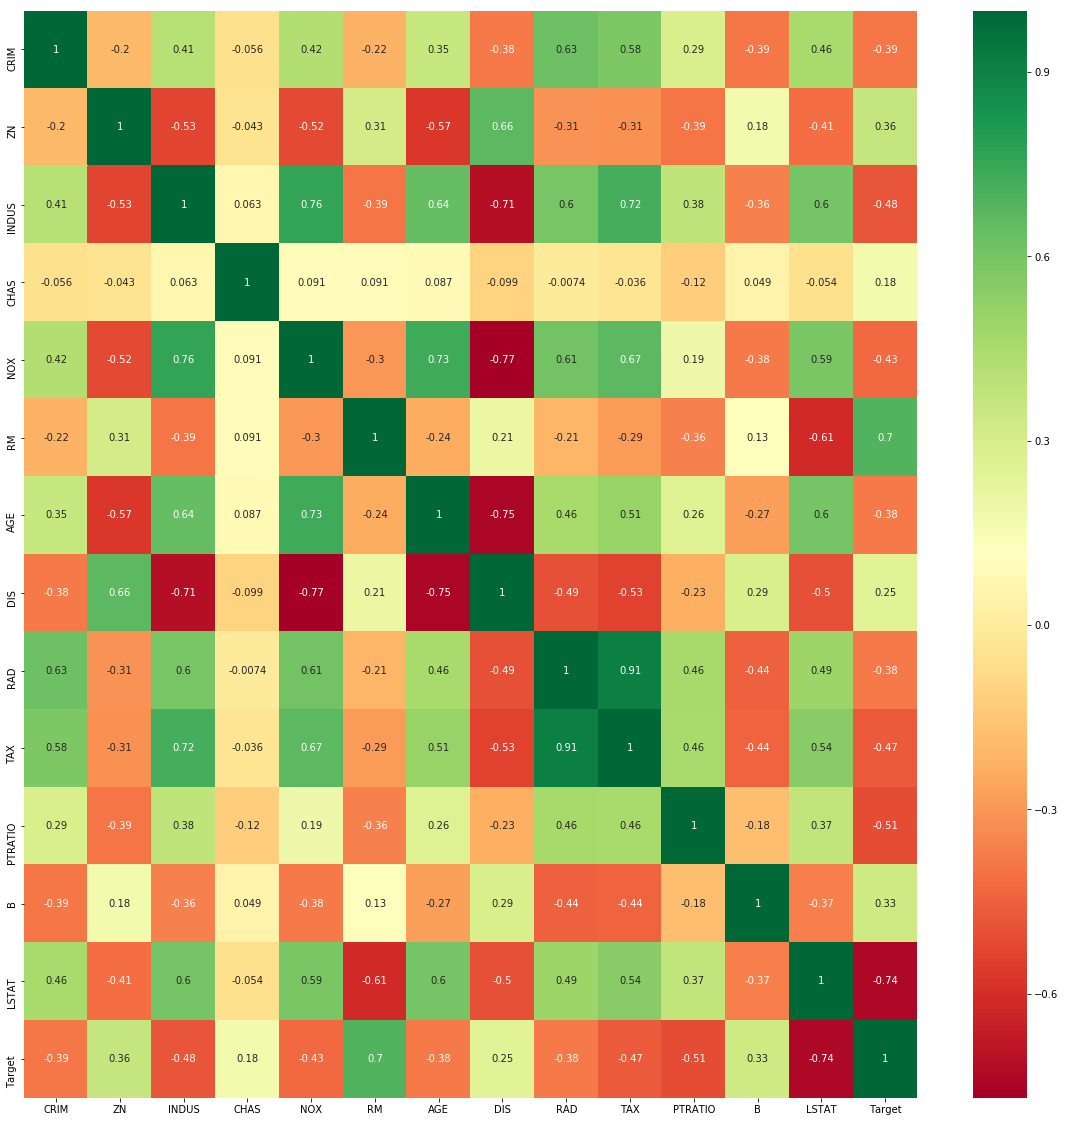

In [7]:
data = X_num
data["Target"] = y_num

import seaborn as sns
import matplotlib.pyplot as plt

#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

### 3)Filter method mutual_info_regression
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_regression.html#sklearn.feature_selection.mutual_info_regression
#### (Note: for Y as Numerical variable) (Boston dataset)

In [8]:
from sklearn.feature_selection import mutual_info_regression
F_p_vals = mutual_info_regression(X_num,y_num)
res_df = pd.DataFrame({"Column_names":X_num.columns,
                      "Estimated mutual information between each feature and the target":F_p_vals})
res_df = res_df.sort_values(by = "Estimated mutual information between each feature and the target", ascending = False)

###################################
#------As function------
def my_mutual_info_regression_funct(X_num,y_num):
    """
    Input is X and Y 
    X can be anything Categorical or Numerical (dataframe)
    y should be cate (Series)
    returns the dataframe with Scores
    """
    from sklearn.feature_selection import mutual_info_regression
    F_p_vals = mutual_info_regression(X_num,y_num)
    res_df = pd.DataFrame({"Column_names":X_num.columns,
                          "Estimated mutual information between each feature and the target":F_p_vals})
    res_df = res_df.sort_values(by = "Estimated mutual information between each feature and the target", ascending = False)


    return res_df
###################################
my_mutual_info_regression_funct(X_num,y_num)

,Column_names,Estimated mutual information between each feature and the target
13,Target,4.621890
12,LSTAT,0.663973
5,RM,0.530345
4,NOX,0.470184
2,INDUS,0.469361
10,PTRATIO,0.446221
9,TAX,0.356779
0,CRIM,0.332799
6,AGE,0.308778
7,DIS,0.297468


## 4) Filter method for Classification we have  
### i) f_classifi, 
### ii) mutual_info_classifi
https://scikit-learn.org/stable/modules/feature_selection.html
### -----------------------------------------------------------------

### 2) Feature importance method (Tree Based)
##### simply gives the score of the each indep vars on dep var
#### (Note: for Y as Categorical variable) (Iris dataset)

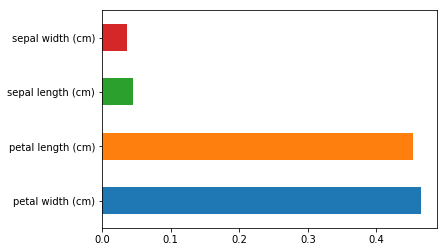

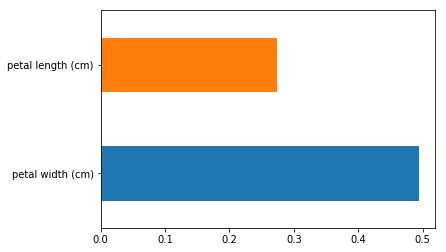

In [9]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X_cate,y_cate)

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X_cate.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

###################################
#------As function------
def my_ExtraTreesClas_funct(X_cate,y_cate,n_best_indepvar):
    """
    Input is X and Y and bestindepvar that we want
    X can be anything Categorical or Numerical
    y should be cate
    n_best_indepvar is any int values
    returns the Plot with Scores
    """
    from sklearn.ensemble import ExtraTreesClassifier
    import matplotlib.pyplot as plt
    model = ExtraTreesClassifier()
    model.fit(X_cate,y_cate)

    #plot graph of feature importances for better visualization
    feat_importances = pd.Series(model.feature_importances_, index=X_cate.columns)
    feat_importances.nlargest(n_best_indepvar).plot(kind='barh')
    return plt.show()

###################################
my_ExtraTreesClas_funct(X_cate,y_cate,2)

### 3)RFE (Recursive Feature Elimination)

https://github.com/bhattbhavesh91/GA_Sessions/blob/master/ga_dsmp_5jan2019/16_feature_selection.ipynb

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV

clf_lr = LogisticRegression()
rfe = RFE(estimator=clf_lr, step=1)
rfe = rfe.fit(X_cate, y_cate)

selected_rfe_features = pd.DataFrame({'Feature':list(X_cate.columns),
                                      'Ranking':rfe.ranking_})
selected_rfe_features.sort_values(by='Ranking')

,Feature,Ranking
1,sepal width (cm),1
3,petal width (cm),1
2,petal length (cm),2
0,sepal length (cm),3
